In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

file = pd.read_csv('./Lista1.csv', ';')

print("Shape")
print("Training:  ", file.shape)
print("Test:      ", file.shape)

display(file.describe())
display(file.head(10))

# Each variable has its own relation with `Outcome`
# Lets plot to better understand it
tmp = file.copy()

for feature in tmp:
    if feature != "Outcome":
        sns.catplot(x=feature, kind="count", hue="Outcome", data=tmp, height=7, aspect=2.5)
        plt.xlabel(feature)
        plt.ylabel("Outcome")
        plt.show()

Shape
Training:   (798, 14)
Test:       (798, 14)


,Age,HealthFactor1,HealthFactor2,BMI,DiabetesPedigreeFunction,Pregnancies,Glucose,BloodPressure,PreviousSurgery,SkinThickness,Insulin,Inheritance,Outcome
count,798.000000,798.000000,787.000000,798.000000,798.000000,798.000000,798.000000,798.000000,752.0,798.000000,798.000000,429.000000,798.000000
mean,33.434837,33.143885,99.452351,31.980075,0.471504,3.907268,121.166667,69.125313,0.0,20.404762,80.902256,0.694639,0.357143
std,11.801267,9.613478,56.680603,7.916640,0.335453,3.392208,31.963020,19.550516,0.0,15.994755,118.463482,0.461098,0.479458
min,21.000000,16.800000,1.000000,0.000000,0.078000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,24.000000,25.520000,51.000000,27.300000,0.243250,1.000000,99.000000,62.500000,0.0,0.000000,0.000000,0.000000,0.000000
50%,29.000000,30.370000,98.000000,32.000000,0.370500,3.000000,117.000000,72.000000,0.0,23.000000,30.500000,1.000000,0.000000
75%,41.000000,39.440000,149.000000,36.600000,0.614750,6.000000,141.000000,80.000000,0.0,32.000000,128.750000,1.000000,1.000000
max,81.000000,69.980000,200.000000,67.100000,2.420000,17.000000,199.000000,122.000000,0.0,99.000000,846.000000,1.000000,1.000000


,Patient,Age,HealthFactor1,HealthFactor2,BMI,DiabetesPedigreeFunction,Pregnancies,Glucose,BloodPressure,PreviousSurgery,SkinThickness,Insulin,Inheritance,Outcome
0,p1,50,46.72,176.0,33.6,0.627,6,148,72,0.0,35,0,NaN,1
1,p2,31,30.12,160.0,26.6,0.351,1,85,66,0.0,29,0,1.0,0
2,p3,32,30.26,88.0,23.3,0.672,8,183,64,0.0,0,0,1.0,1
3,p4,21,22.42,125.0,28.1,0.167,1,89,66,0.0,23,94,NaN,0
4,p5,33,35.02,NaN,43.1,2.288,0,137,40,0.0,35,168,0.0,1
5,p6,30,29.12,126.0,25.6,0.201,5,116,74,0.0,0,0,1.0,0
6,p7,26,27.00,95.0,31.0,0.248,3,78,50,0.0,32,88,0.0,1
7,p8,29,30.26,95.0,35.3,0.134,10,115,0,0.0,0,0,1.0,0
8,p9,53,48.50,72.0,30.5,0.158,2,197,70,0.0,45,543,1.0,1
9,p10,54,43.20,87.0,0.0,0.232,8,125,96,0.0,0,0,1.0,1


<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

<Figure size 1824.36x700 with 1 Axes>

In [2]:
# If there is missing data there should be additional logic to handle it
print("feature - missing values - zeros")
for feature in file:
    missing_values = file[feature].isnull().sum()
    zeros = len(file[feature]) - np.count_nonzero(file[feature])
    print(feature + " - " + str(missing_values) + " - " + str(zeros)) 

# There is only one `Previous Surgery`, let's drop it
# Drop useless patient column
clean_file = file.drop(["PreviousSurgery", "Patient"], 1)

# Only 11 lines have invalid HealthFactor2, we could drop the lines from the test
# But let's assume a value equal to the mean for the sake of simplicity
# clean_file = clean_file[pd.notnull(clean_file['HealthFactor2'])]
clean_file['HealthFactor2'].fillna(99.45, inplace=True)

# The majority of values in Inheritance is 1, so let's assume missing values are 1
clean_file['Inheritance'].fillna(1.0, inplace=True)

# Print new header
display(clean_file.describe())
display(clean_file.head(10))



feature - missing values - zeros
Patient - 0 - 0
Age - 0 - 0
HealthFactor1 - 0 - 0
HealthFactor2 - 11 - 0
BMI - 0 - 12
DiabetesPedigreeFunction - 0 - 0
Pregnancies - 0 - 113
Glucose - 0 - 5
BloodPressure - 0 - 37
PreviousSurgery - 46 - 752
SkinThickness - 0 - 240
Insulin - 0 - 389
Inheritance - 369 - 131
Outcome - 0 - 513


,Age,HealthFactor1,HealthFactor2,BMI,DiabetesPedigreeFunction,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Inheritance,Outcome
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,33.434837,33.143885,99.452318,31.980075,0.471504,3.907268,121.166667,69.125313,20.404762,80.902256,0.835840,0.357143
std,11.801267,9.613478,56.288098,7.916640,0.335453,3.392208,31.963020,19.550516,15.994755,118.463482,0.370653,0.479458
min,21.000000,16.800000,1.000000,0.000000,0.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,25.520000,53.000000,27.300000,0.243250,1.000000,99.000000,62.500000,0.000000,0.000000,1.000000,0.000000
50%,29.000000,30.370000,99.000000,32.000000,0.370500,3.000000,117.000000,72.000000,23.000000,30.500000,1.000000,0.000000
75%,41.000000,39.440000,149.000000,36.600000,0.614750,6.000000,141.000000,80.000000,32.000000,128.750000,1.000000,1.000000
max,81.000000,69.980000,200.000000,67.100000,2.420000,17.000000,199.000000,122.000000,99.000000,846.000000,1.000000,1.000000


,Age,HealthFactor1,HealthFactor2,BMI,DiabetesPedigreeFunction,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Inheritance,Outcome
0,50,46.72,176.00,33.6,0.627,6,148,72,35,0,1.0,1
1,31,30.12,160.00,26.6,0.351,1,85,66,29,0,1.0,0
2,32,30.26,88.00,23.3,0.672,8,183,64,0,0,1.0,1
3,21,22.42,125.00,28.1,0.167,1,89,66,23,94,1.0,0
4,33,35.02,99.45,43.1,2.288,0,137,40,35,168,0.0,1
5,30,29.12,126.00,25.6,0.201,5,116,74,0,0,1.0,0
6,26,27.00,95.00,31.0,0.248,3,78,50,32,88,0.0,1
7,29,30.26,95.00,35.3,0.134,10,115,0,0,0,1.0,0
8,53,48.50,72.00,30.5,0.158,2,197,70,45,543,1.0,1
9,54,43.20,87.00,0.0,0.232,8,125,96,0,0,1.0,1


C:\Users\Tuniks\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Tuniks\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


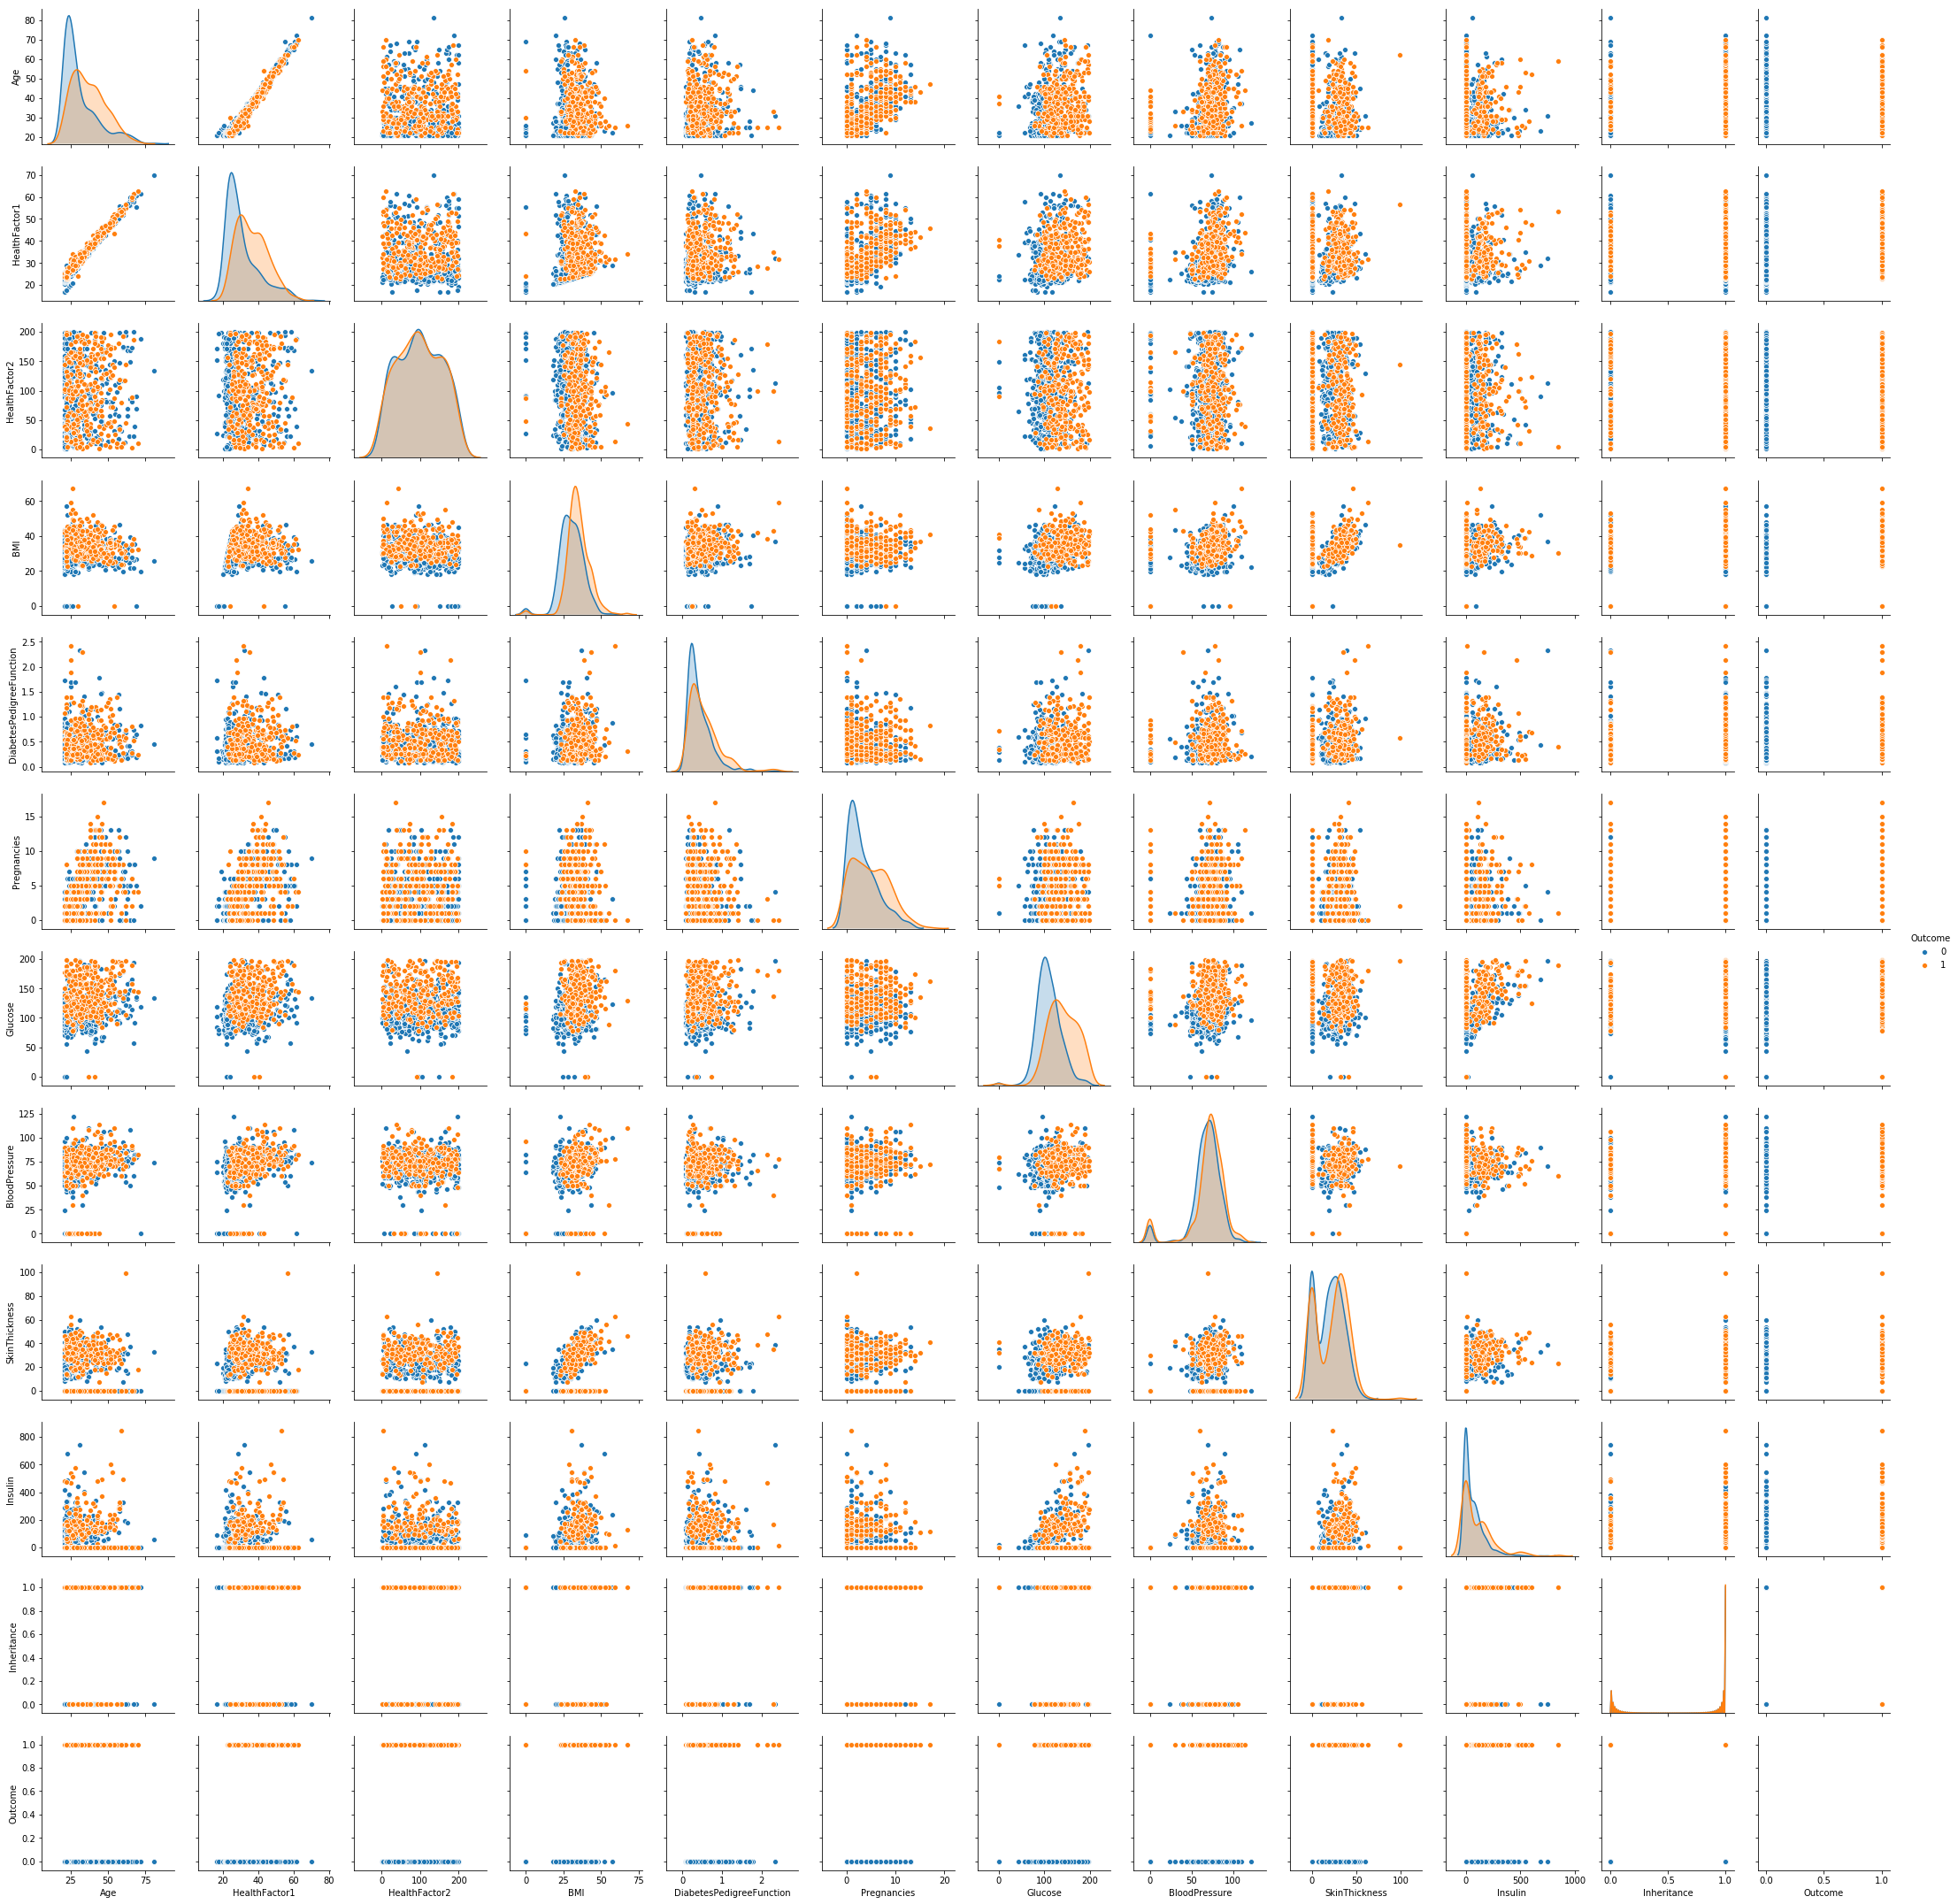

In [17]:
# No categorical data to deal with
# # Pair Plot
p = sns.pairplot(clean_file, hue="Outcome")

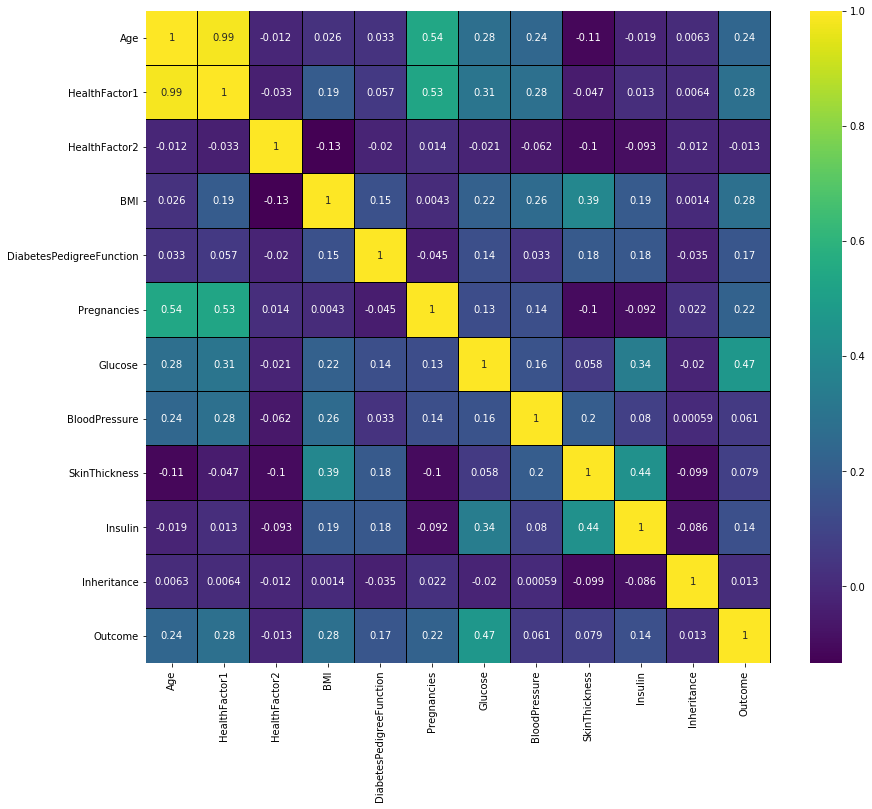

In [4]:
# # Correlation
correlation = clean_file.corr()

# # Heatmap makes direct relations very clear and helps emphasize the most important variables
plt.subplots(figsize = (14,12))
sns.heatmap(correlation, linewidths = 0.01, linecolor = "black", annot = True, annot_kws = {'size': 10},
            cmap = 'viridis')
plt.show()

In [5]:
# Split training data to enable model verification

y = clean_file['Outcome']
X = clean_file.drop("Outcome", 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=115023276)

print("Shape")
print("X:", X.shape)
print("Y:", y.shape)
print(X.head)
print(y.head)


Shape
X: (798, 11)
Y: (798,)
<bound method NDFrame.head of      Age  HealthFactor1  HealthFactor2   BMI  DiabetesPedigreeFunction  \
0     50          46.72         176.00  33.6                     0.627   
1     31          30.12         160.00  26.6                     0.351   
2     32          30.26          88.00  23.3                     0.672   
3     21          22.42         125.00  28.1                     0.167   
4     33          35.02          99.45  43.1                     2.288   
5     30          29.12         126.00  25.6                     0.201   
6     26          27.00          95.00  31.0                     0.248   
7     29          30.26          95.00  35.3                     0.134   
8     53          48.50          72.00  30.5                     0.158   
9     54          43.20          87.00   0.0                     0.232   
10    30          31.52         115.00  37.6                     0.191   
11    34          34.80         180.00  38.0         

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score

activations = ['relu', 'logistic', 'tanh', 'identity']
layers = [(3),
          (5),
          (10),
          (3, 3),
          (5, 5),
          (3, 3, 3),
          (5, 5, 5),
          (10, 10, 10),
         ]

# solvers = ['lbfgs', 'adam']
solvers = ['lbfgs']


for solver in solvers:
    for layer in layers:
        for act in activations:
            classifier = MLPClassifier(hidden_layer_sizes=layer, activation=act, solver=solver, random_state=115023276).fit(X_train, y_train)
            prediction = classifier.predict(X_test)
            print(layer, " - ", act, " - ", roc_auc_score(y_test, prediction))


3  -  relu  -  0.5056818181818182
3  -  logistic  -  0.5200358851674641
3  -  tanh  -  0.5430622009569378
3  -  identity  -  0.742822966507177
5  -  relu  -  0.5
5  -  logistic  -  0.6297846889952153
5  -  tanh  -  0.5828349282296651
5  -  identity  -  0.7257775119617224
10  -  relu  -  0.6979665071770336
10  -  logistic  -  0.6255980861244019
10  -  tanh  -  0.5759569377990432
10  -  identity  -  0.7233851674641147
(3, 3)  -  relu  -  0.5
(3, 3)  -  logistic  -  0.563397129186603
(3, 3)  -  tanh  -  0.4868421052631579
(3, 3)  -  identity  -  0.729066985645933
(5, 5)  -  relu  -  0.5
(5, 5)  -  logistic  -  0.6055622009569378
(5, 5)  -  tanh  -  0.61872009569378
(5, 5)  -  identity  -  0.6967703349282296
(3, 3, 3)  -  relu  -  0.5
(3, 3, 3)  -  logistic  -  0.4949162679425837
(3, 3, 3)  -  tanh  -  0.6019736842105263
(3, 3, 3)  -  identity  -  0.7347488038277513
(5, 5, 5)  -  relu  -  0.5962918660287082
(5, 5, 5)  -  logistic  -  0.5589114832535885
(5, 5, 5)  -  tanh  -  0.546949760765